# Supplementary Figures
## Imports

In [1]:
import pandas as pd
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
from Shared_Scripts.plotting_functions import correlation
import StudyII_All_5_note_Sets.paths as StudyII_paths
import Study_Likert.paths as Study_likert_paths
import seaborn as sns
import os
from scipy import stats

Run_Stats = True

studyI_GL = pd.read_pickle(
    StudyI_paths.processed_dir + StudyI_paths.post_exclusion_data_pickle_filename)  # Study I: Post-exclusion group-level data

# Load Data
studyII_GL = pd.read_pickle(
    StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename)  # Study II: Post-exclusion group-level data

study_likert = pd.read_csv(Study_likert_paths.processed_dir + 'set_level_results.csv')  # Study II: Likert ratings

studyII_GL['EOS_std'] = studyII_GL['evenness_of_spread']**(1/2)
temp = studyII_GL['EOS_std_inv'] = 1-studyII_GL['EOS_std']

ROOT_DIR = os.path.abspath(os.getcwd())  # This is where this file is


### Score distribution Table (in LaTeX format)

In [13]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)','IC1','IC5','IC6','EOS_std_inv']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set','EOS_std_inv':'Evenness'})

# Print Pandas as table
print(temp.style.to_latex())

\begin{tabular}{llrrrrr}
 & Set & Bias towards note deviation & IC1 & IC5 & IC6 & Evenness \\
7 & 0 1 2 4 8 & -0.007997 & 2.000000 & 1.000000 & 1.000000 & 0.905719 \\
2 & 0 1 2 3 6 & 0.032666 & 3.000000 & 1.000000 & 1.000000 & 0.873070 \\
3 & 0 1 2 3 7 & 0.055176 & 3.000000 & 2.000000 & 1.000000 & 0.882149 \\
59 & 0 3 4 6 8 & 0.062662 & 1.000000 & 1.000000 & 1.000000 & 0.933333 \\
65 & 0 4 5 6 7 & 0.067452 & 3.000000 & 2.000000 & 1.000000 & 0.882149 \\
11 & 0 1 2 6 7 & 0.083613 & 3.000000 & 3.000000 & 2.000000 & 0.915016 \\
61 & 0 3 5 6 7 & 0.083871 & 2.000000 & 2.000000 & 1.000000 & 0.902817 \\
5 & 0 1 2 4 6 & 0.084478 & 2.000000 & 1.000000 & 1.000000 & 0.889446 \\
52 & 0 2 5 6 8 & 0.087034 & 1.000000 & 1.000000 & 2.000000 & 0.942265 \\
43 & 0 2 4 5 6 & 0.087099 & 2.000000 & 1.000000 & 1.000000 & 0.889446 \\
9 & 0 1 2 5 7 & 0.089306 & 2.000000 & 3.000000 & 1.000000 & 0.915016 \\
1 & 0 1 2 3 5 & 0.096240 & 3.000000 & 1.000000 & 0.000000 & 0.856628 \\
51 & 0 2 5 6 7 & 0.096457 & 2.00000

### Score distribution Table (in pandas format)

In [14]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)','IC1','IC5','IC6','EOS_std_inv']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set','EOS_std_inv':'Evenness'})

# Create a doc file with the table
temp.to_csv('score_distribution_table.csv')

# Print Pandas as table
print(temp)

          Set  Bias towards note deviation  IC1  IC5  IC6  Evenness
7   0 1 2 4 8                    -0.007997  2.0  1.0  1.0  0.905719
2   0 1 2 3 6                     0.032666  3.0  1.0  1.0  0.873070
3   0 1 2 3 7                     0.055176  3.0  2.0  1.0  0.882149
59  0 3 4 6 8                     0.062662  1.0  1.0  1.0  0.933333
65  0 4 5 6 7                     0.067452  3.0  2.0  1.0  0.882149
..        ...                          ...  ...  ...  ...       ...
37  0 2 3 5 7                     0.256795  1.0  3.0  0.0  0.915016
16  0 1 3 4 8                     0.260043  2.0  2.0  0.0  0.915016
44  0 2 4 5 7                     0.287388  1.0  3.0  0.0  0.915016
19  0 1 3 5 8                     0.317994  1.0  3.0  0.0  0.937639
50  0 2 4 7 9                     0.320470  0.0  4.0  0.0  0.976430

[66 rows x 6 columns]


### Likert Ratings
#### "Some notes felt more important than others." correlation with scores

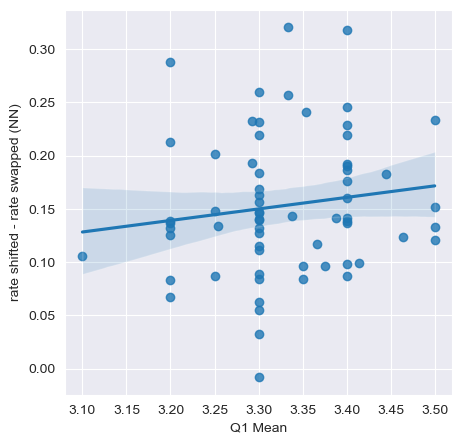

In [2]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q1 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5, save_to=ROOT_DIR + "/Plots/correlation_likert_hierarchy.svg")

#### "The audio clip was melodic." correlation with scores

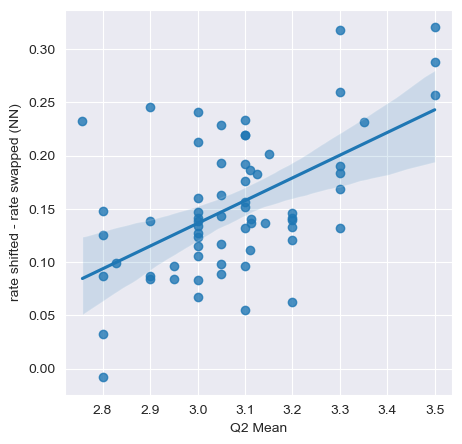

In [9]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q2 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5, save_to=ROOT_DIR + "/Plots/correlation_likert_melodic.svg")

#### "The melody as a whole or parts of it felt familiar." correlation with scores

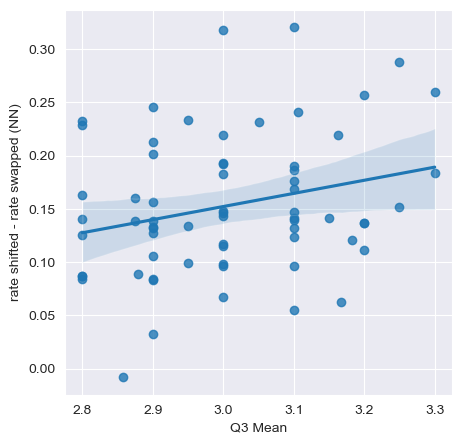

In [10]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q3 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5,save_to=ROOT_DIR + "/Plots/correlation_likert_familiarity.svg")

### Study I results  (12-note) for musicians and non-musicians

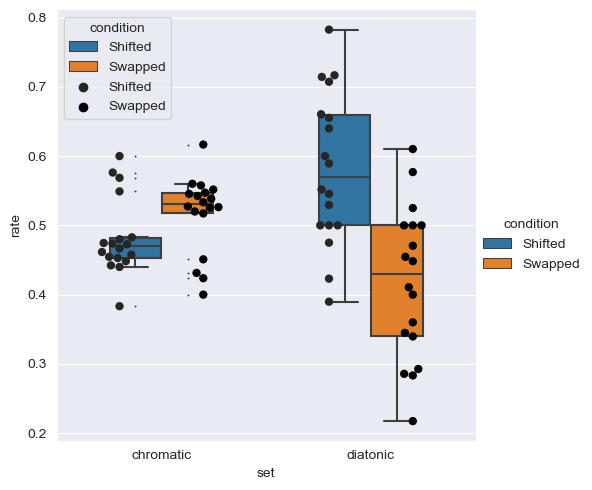

In [11]:
# Only keep rows with length 12 or 16
temp = studyI_GL[studyI_GL['length'] >= 12]

# Only keep people who are not musicians
temp = temp[temp["How many years of formal musical training do you have?"] == "0"]

temp = temp[temp["Do you play any instruments (with or without formal training)?"] == "No"]

temp = temp[['rate_NN_shifted','rate_NN_swapped','set']]
temp = pd.melt(temp,id_vars=["set"],var_name="condition",value_name="rate")
temp['condition'] = temp['condition'].replace('rate_NN_shifted',"Shifted")
temp['condition'] = temp['condition'].replace('rate_NN_swapped',"Swapped")

ax = sns.catplot(x="set", y="rate", data=temp, kind="box", hue="condition", fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=temp, x="set", y="rate", hue="condition", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

# save figure
ax.savefig(ROOT_DIR + "/Plots/StudyI_musicianship.svg", format="svg", dpi=300)

## RUN STATISTICS

In [33]:
if Run_Stats:
# 8-notes (one-way t-test)
    note_8_chromatic = temp[temp['set']=='chromatic']
    note_8_pentatonic = temp[temp['set']=='diatonic']

    [diff_8_note_chromatic, P_8_note_chromatic] = stats.ttest_1samp(note_8_chromatic[note_8_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    [diff_8_note_pentatonic, P_8_note_pentatonic] = stats.ttest_1samp(note_8_pentatonic[note_8_pentatonic['condition']=='Shifted']['rate'].values, 0.5)